In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [7]:
# input files/dirs
CADD_SCORE_ENRICHMENT = "../results/cadd_score_enrichment"
CADD_SCORES_GENIC_REGION = "../results/cadd_scores_genic_regions"

## Normalized CADD Scores by genic region

In [15]:
files = os.listdir(CADD_SCORE_ENRICHMENT)
files = [f for f in files if f.endswith(".tsv") and "promoter" not in f]
print(files)
all_cadd_score_enrichment = []
for file in files:
	cancer_type = file.split(".")[0]
	df = pd.read_csv(f"{CADD_SCORE_ENRICHMENT}/{file}", sep="\t")
	# create dictionary with region as key and fraction as value
	cancer_data = {"cancer_type": cancer_type}
	for index, row in df.iterrows():
		cancer_data[row["genic_region"]] = row["enrichment"]
	all_cadd_score_enrichment.append(cancer_data)
all_cadd_score_enrichment_df = pd.DataFrame(all_cadd_score_enrichment)
all_cadd_score_enrichment_df.set_index("cancer_type", inplace=True)
all_cadd_score_enrichment_df.sort_index(inplace=True)
all_cadd_score_enrichment_df = all_cadd_score_enrichment_df.T
all_cadd_score_enrichment_df = np.log10(all_cadd_score_enrichment_df)
regions = ["UTR5", "UTR3", "intronic", "exonic", "upstream", "downstream", "ncRNA"]
all_cadd_score_enrichment_df = all_cadd_score_enrichment_df.loc[regions]
# all_cadd_score_enrichment_df = all_cadd_score_enrichment_df.apply(lambda x: np.log10(x), axis=1)
all_cadd_score_enrichment_df

['CNS-Oligo.tsv', 'Kidney-ChRCC.tsv', 'Prost-AdenoCA.tsv', 'Kidney-RCC.tsv', 'Stomach-AdenoCA.tsv', 'CNS-Medullo.tsv', 'Thy-AdenoCA.tsv', 'Myeloid-MPN.tsv', 'Bone-Leiomyo.tsv', 'Lymph-BNHL.tsv', 'Myeloid-AML.tsv', 'Lung-AdenoCA.tsv', 'CNS-GBM.tsv', 'Head-SCC.tsv', 'Breast-AdenoCa.tsv', 'Ovary-AdenoCA.tsv', 'CNS-PiloAstro.tsv', 'Cervix-SCC.tsv', 'Liver-HCC.tsv', 'Bone-Osteosarc.tsv', 'Biliary-AdenoCA.tsv', 'Skin-Melanoma.tsv', 'Lung-SCC.tsv', 'Lymph-CLL.tsv', 'Panc-Endocrine.tsv', 'Bladder-TCC.tsv', 'Panc-AdenoCA.tsv', 'ColoRect-AdenoCA.tsv', 'Breast-LobularCa.tsv', 'Eso-AdenoCa.tsv', 'Uterus-AdenoCA.tsv']


cancer_type,Biliary-AdenoCA,Bladder-TCC,Bone-Leiomyo,Bone-Osteosarc,Breast-AdenoCa,Breast-LobularCa,CNS-GBM,CNS-Medullo,CNS-Oligo,CNS-PiloAstro,...,Myeloid-AML,Myeloid-MPN,Ovary-AdenoCA,Panc-AdenoCA,Panc-Endocrine,Prost-AdenoCA,Skin-Melanoma,Stomach-AdenoCA,Thy-AdenoCA,Uterus-AdenoCA
UTR5,NaN,0.255701,5.450344,NaN,0.555960,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.602973,-0.653293,NaN,NaN,5.465245,5.381427,NaN,5.282343
UTR3,-0.102239,5.086783,5.234247,NaN,0.167260,NaN,-0.013082,5.222038,NaN,NaN,...,0.000000,NaN,0.386533,-0.327350,NaN,-0.124466,0.230048,0.702153,NaN,-0.106241
intronic,0.188631,-0.048681,5.215459,5.211968,0.199146,4.019997,-0.252166,-0.582884,5.698971,0.055239,...,NaN,0.000000,0.615083,0.046787,0.034772,0.181389,0.097100,0.319878,1.181204,0.257497
exonic,5.884295,-0.223431,5.996802,5.902055,0.773408,NaN,0.414303,0.229917,NaN,5.731183,...,5.893667,5.698971,-0.062952,-0.051492,0.359816,5.781056,0.266354,0.521457,6.000000,-0.220567
upstream,NaN,-0.245253,5.244137,NaN,4.737254,NaN,0.184742,NaN,NaN,NaN,...,NaN,NaN,4.512342,5.120693,NaN,5.275179,0.163954,0.469578,NaN,-4.463358
downstream,-0.495838,-0.422606,NaN,NaN,5.093754,NaN,4.128167,5.035069,NaN,NaN,...,NaN,NaN,5.352531,0.576661,NaN,5.459045,-0.029359,-0.277835,NaN,0.012986
ncRNA,4.808984,4.730395,NaN,NaN,5.034423,NaN,-0.195181,4.738800,NaN,NaN,...,NaN,4.844865,5.264264,0.034564,4.615360,5.175396,5.243425,5.331212,NaN,NaN


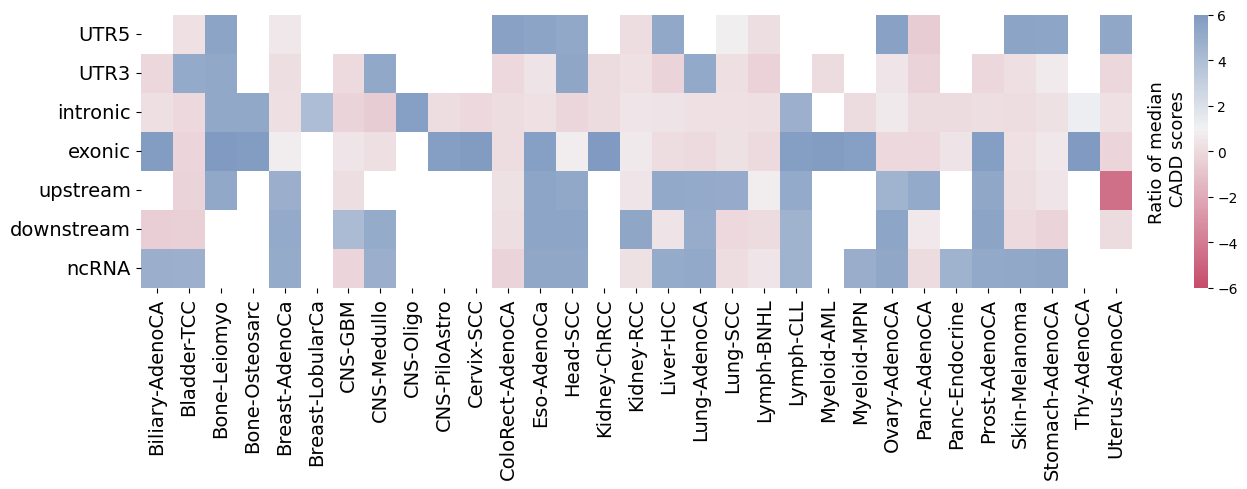

In [17]:
# Enrichment of median CADD scores of samples without driver mutations over samples with driver mutations
plt.figure(figsize=(14, 5))
ax = sns.heatmap(
    all_cadd_score_enrichment_df,
    cmap=sns.diverging_palette(0, 250, 60, 50, as_cmap=True),
    center=1,
    vmin=-6,
	vmax=6,
)
# colorbar label
cbar = ax.collections[0].colorbar
cbar.set_label("Ratio of median\n CADD scores", fontsize=13, labelpad=5)
cbar.ax.yaxis.set_label_position("left")

# x-axis labels
xticklabels = ax.get_xticklabels()
ax.set_xticklabels([x.get_text().replace("_", "/") for x in xticklabels])
plt.xlabel("")
plt.xticks(fontsize=14)

# plt.ylabel("Genic Region", fontsize=11, labelpad=10)
plt.yticks(fontsize=14, rotation=0)
plt.tight_layout()

In [10]:
files = os.listdir(CADD_SCORES_GENIC_REGION)
files = [f for f in files if f.endswith(".tsv") and "promoter" not in f]
print(files)

mut_genic_df = pd.DataFrame()
for f in files:
	df = pd.read_csv(f"{CADD_SCORES_GENIC_REGION}/{f}", sep="\t")
	df["cancer_type"] = f.split(".")[0]
	mut_genic_df = pd.concat([mut_genic_df, df])
mut_genic_df.reset_index(drop=True, inplace=True)
print(mut_genic_df.shape)

# mut_genic_df["CADD_score_normalized"] = mut_genic_df.groupby(["gene"])["CADD_score_raw"].transform(lambda x: (x - x.min()) / (x.max() - x.min()) if x.max() - x.min() > 0 else 0.5)
mut_genic_df.head()

['CNS-Oligo.tsv', 'Kidney-ChRCC.tsv', 'Prost-AdenoCA.tsv', 'Kidney-RCC.tsv', 'Stomach-AdenoCA.tsv', 'CNS-Medullo.tsv', 'Thy-AdenoCA.tsv', 'Myeloid-MPN.tsv', 'Bone-Leiomyo.tsv', 'Lymph-BNHL.tsv', 'Myeloid-AML.tsv', 'Lung-AdenoCA.tsv', 'CNS-GBM.tsv', 'Head-SCC.tsv', 'Breast-AdenoCa.tsv', 'Ovary-AdenoCA.tsv', 'CNS-PiloAstro.tsv', 'Cervix-SCC.tsv', 'Liver-HCC.tsv', 'Bone-Osteosarc.tsv', 'Biliary-AdenoCA.tsv', 'Skin-Melanoma.tsv', 'Lung-SCC.tsv', 'Lymph-CLL.tsv', 'Panc-Endocrine.tsv', 'Bladder-TCC.tsv', 'Panc-AdenoCA.tsv', 'ColoRect-AdenoCA.tsv', 'Breast-LobularCa.tsv', 'Eso-AdenoCa.tsv', 'Uterus-AdenoCA.tsv']
(77042, 17)


,index,gene,Strand,Variant_Classification,Tumor_Sample_Barcode,Patient_ID,mutation,mutation_loc,driver,driver_mutation_type,has_driver,genic_region,CADD_score_raw,CADD_score_PHRED,gene_length,CADD_score_normalized,cancer_type
0,0,FUBP1,+,Splice_Site,00493087-9d9d-40ca-86d5-936f1b951c93,DO22145,1:78425869-78425869:C:G,1:78425869:C:G,True,"mutational, CNA",Drivers,exonic,6.224800,33.0,35055,0.846118,CNS-Oligo
1,1,CIC,+,Missense_Mutation,00493087-9d9d-40ca-86d5-936f1b951c93,DO22145,19:42791826-42791826:T:C,19:42791826:T:C,True,"mutational, CNA",Drivers,exonic,5.575207,29.7,27261,0.797949,CNS-Oligo
2,2,CIC,+,Missense_Mutation,00493087-9d9d-40ca-86d5-936f1b951c93,DO22145,19:42798878-42798878:T:G,19:42798878:T:G,True,"mutational, CNA",Drivers,exonic,4.657281,25.4,27261,0.448081,CNS-Oligo
3,3,IDH1,+,Missense_Mutation,00493087-9d9d-40ca-86d5-936f1b951c93,DO22145,2:209113112-209113112:C:T,2:209113112:C:T,True,mutational,Drivers,exonic,3.897263,23.4,29848,0.000000,CNS-Oligo
4,4,TP53,+,Nonsense_Mutation,2aeaab9f-4459-4be8-91e7-e0746cbd671c,DO22285,17:7574012-7574012:C:A,17:7574012:C:A,True,"mutational, CNA",Drivers,exonic,8.096992,36.0,25760,0.750267,CNS-Oligo


[(('exonic', 'Passengers in presence of driver'), ('exonic', 'Passengers in absence of driver')), (('UTR5', 'Passengers in presence of driver'), ('UTR5', 'Passengers in absence of driver')), (('upstream', 'Passengers in presence of driver'), ('upstream', 'Passengers in absence of driver')), (('UTR3', 'Passengers in presence of driver'), ('UTR3', 'Passengers in absence of driver')), (('ncRNA', 'Passengers in presence of driver'), ('ncRNA', 'Passengers in absence of driver')), (('intronic', 'Passengers in presence of driver'), ('intronic', 'Passengers in absence of driver')), (('downstream', 'Passengers in presence of driver'), ('downstream', 'Passengers in absence of driver'))]
p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <=

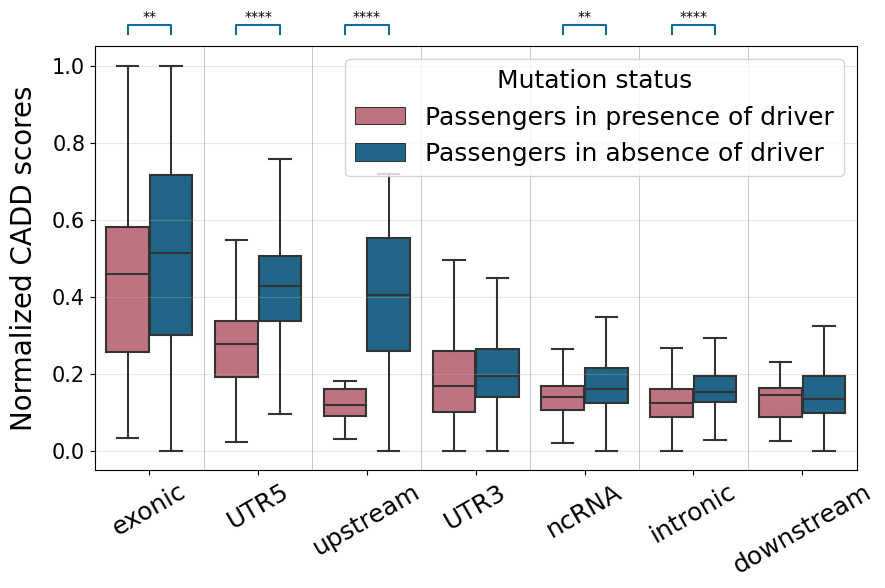

In [18]:
plt.figure(figsize=(9, 6))
colors = ["#CC6677", "#106C9A", "#529267"]
cmap = sns.color_palette(colors)

# sort genic region by median CADD scores
median_values = mut_genic_df.groupby(["genic_region"])["CADD_score_normalized"].median().reset_index()
median_values.sort_values(by="CADD_score_normalized", ascending=False, inplace=True)
median_values_order = median_values["genic_region"].tolist()
unwanted_regions = ["-", "splicing", "intergenic"]
for region in unwanted_regions:
	if region in median_values_order:
		median_values_order.remove(region)

hue_order = ["Passengers in presence of driver", "Passengers in absence of driver"]

ax = sns.boxplot(
    x="genic_region",
	y="CADD_score_normalized",
	hue="has_driver",
	data=mut_genic_df,
	order=median_values_order,
    hue_order=hue_order,
    palette=cmap,
	showfliers=False
)

# add grid lines
ax.grid(axis='y', alpha=0.3)
for i in range(len(median_values_order) - 1):
	ax.axvline(i + 0.5, color='black', lw=0.5, alpha=0.3)
     
# add statistical significance annotations
box_pairs = []
for region in median_values_order:
    region_data = mut_genic_df[mut_genic_df["genic_region"] == region]
    if len(region_data["has_driver"].unique().tolist()) >= 2:
        box_pairs.append(((region, "Passengers in presence of driver"), (region, "Passengers in absence of driver")))
print(box_pairs)

annotator = Annotator(
    ax, 
    data=mut_genic_df,
    x="genic_region",
    y="CADD_score_normalized", 
    hue="has_driver",
    order=median_values_order,
    hue_order=hue_order,
    pairs=box_pairs,
)
annotator.configure(test='Mann-Whitney-gt', text_format='star', loc='outside', hide_non_significant=True, color=colors[0])
annotator.configure(comparisons_correction="fdr_bh", verbose=2)
annotator.apply_test().annotate()
annotator.configure(test='Mann-Whitney-ls', text_format='star', loc='outside', hide_non_significant=True, color=colors[1])
annotator.configure(comparisons_correction="fdr_bh", verbose=2)
annotator.apply_test().annotate()

plt.xlabel("", labelpad=10)
plt.xticks(rotation=30, fontsize=18)
plt.ylabel("Normalized CADD scores", fontsize=20, labelpad=10)
plt.yticks(fontsize=15)
plt.legend(title="Mutation status", fontsize=18, title_fontsize=18)
plt.tight_layout()